In [1]:
import os
#import re
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")

In [2]:
pd.__version__

'1.0.3'

In [3]:
protein_anchorcontain_csvs = glob.glob("../prot-input.anchor-compare/*anchor_containment.csv")
protein_anchorjaccard_csvs = glob.glob("../prot-input.anchor-compare/*anchor_jaccard.csv")
nucl_anchorcontain_csvs = glob.glob("../dna-input.anchor-compare/gtdb95-evolpaths.nucleotide*anchor_containment.csv")
nucl_anchorjaccard_csvs = glob.glob("../dna-input.anchor-compare/gtdb95-evolpaths.nucleotide*anchor_jaccard.csv")

anchorcontain_csvs = protein_anchorcontain_csvs + nucl_anchorcontain_csvs
anchorjaccard_csvs = protein_anchorjaccard_csvs + nucl_anchorjaccard_csvs

print("\n".join(anchorcontain_csvs))
print("")
print("\n".join(anchorjaccard_csvs))

../prot-input.anchor-compare/gtdb95-evolpaths.protein-k9.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.protein-k7.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.dayhoff-k19.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.hp-k35.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.protein-k11.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.dayhoff-k17.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.hp-k33.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.protein-k10.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.dayhoff-k15.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.hp-k30.anchor_containment.csv
../dna-input.anchor-compare/gtdb95-evolpaths.nucleotide-k21.anchor_containment.csv
../dna-input.anchor-compare/gtdb95-evolpaths.nucleotide-k51.anchor_containment.csv
../dna-input.anchor-compare/gtdb95-evolpa

In [4]:
containDF = pd.concat([pd.read_csv(csv, sep=",").assign(fileinfo=os.path.basename(csv).rsplit("*anchor_containment.csv")[0]) for csv in anchorcontain_csvs], ignore_index=True)

In [5]:
containDF["alphabet"] = containDF["fileinfo"].str.extract(r"gtdb95-evolpaths.(?P<alphabet>\w*)-k")
containDF["ksize"] = containDF["fileinfo"].str.extract(r"-k(?P<ksize>\d*)")
containDF["alpha-ksize"] = containDF["alphabet"] + "-" + containDF["ksize"]
containDF

,evolpath,anchor_species,genus,family,order,class,phylum,superkingdom,fileinfo,alphabet,ksize,alpha-ksize
0,path1,1.0,0.565631,0.043689,0.004272,0.006408,0.000777,0.000777,gtdb95-evolpaths.protein-k9.anchor_containment...,protein,9,protein-9
1,path10,1.0,0.392667,0.050857,0.017938,0.012813,0.006505,0.000394,gtdb95-evolpaths.protein-k9.anchor_containment...,protein,9,protein-9
2,path100,1.0,0.141583,0.038867,0.015452,0.011163,0.006262,0.002723,gtdb95-evolpaths.protein-k9.anchor_containment...,protein,9,protein-9
3,path1000,1.0,0.558610,0.075580,0.060356,0.021313,0.009850,0.004298,gtdb95-evolpaths.protein-k9.anchor_containment...,protein,9,protein-9
4,path1001,1.0,0.156157,0.069271,0.046039,0.018211,0.009021,0.003234,gtdb95-evolpaths.protein-k9.anchor_containment...,protein,9,protein-9
...,...,...,...,...,...,...,...,...,...,...,...,...
38436,path995,1.0,0.004893,0.000376,0.000376,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k31.anchor_contain...,nucleotide,31,nucleotide-31
38437,path996,1.0,0.104712,0.000827,0.000551,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k31.anchor_contain...,nucleotide,31,nucleotide-31
38438,path997,1.0,0.059396,0.000000,0.001007,0.000000,0.000336,0.000000,gtdb95-evolpaths.nucleotide-k31.anchor_contain...,nucleotide,31,nucleotide-31
38439,path998,1.0,0.000956,0.000319,0.000319,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k31.anchor_contain...,nucleotide,31,nucleotide-31


In [6]:
jaccardDF = pd.concat([pd.read_csv(csv, sep=",").assign(fileinfo=os.path.basename(csv).rsplit("*anchor_jaccard.csv")[0]) for csv in anchorjaccard_csvs], ignore_index=True)

In [7]:
jaccardDF

,evolpath,anchor_species,genus,family,order,class,phylum,superkingdom,fileinfo
0,path1,1.0,0.217728,0.010906,0.001286,0.000822,0.000463,0.000099,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv
1,path10,1.0,0.250553,0.024568,0.004397,0.003444,0.001246,0.000000,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv
2,path100,1.0,0.051006,0.014082,0.007092,0.003448,0.002518,0.000894,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv
3,path1000,1.0,0.368313,0.026182,0.024999,0.008840,0.003847,0.001435,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv
4,path1001,1.0,0.060409,0.026927,0.017966,0.007563,0.003340,0.001074,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv
...,...,...,...,...,...,...,...,...,...
38436,path995,1.0,0.001340,0.000339,0.000000,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...
38437,path996,1.0,0.023712,0.000000,0.000265,0.000118,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...
38438,path997,1.0,0.011492,0.000000,0.000295,0.000129,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...
38439,path998,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...


In [8]:
#jaccardDF["evolpath"].fillna(jaccardDF["Unnamed: 0"], inplace=True)
#jaccardDF.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
jaccardDF["alphabet"] = jaccardDF["fileinfo"].str.extract(r"gtdb95-evolpaths.(?P<alphabet>\w*)-k")
jaccardDF["ksize"] = jaccardDF["fileinfo"].str.extract(r"-k(?P<ksize>\d*)")
jaccardDF["alpha-ksize"] = jaccardDF["alphabet"] + "-" + jaccardDF["ksize"]
jaccardDF

,evolpath,anchor_species,genus,family,order,class,phylum,superkingdom,fileinfo,alphabet,ksize,alpha-ksize
0,path1,1.0,0.217728,0.010906,0.001286,0.000822,0.000463,0.000099,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv,protein,11,protein-11
1,path10,1.0,0.250553,0.024568,0.004397,0.003444,0.001246,0.000000,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv,protein,11,protein-11
2,path100,1.0,0.051006,0.014082,0.007092,0.003448,0.002518,0.000894,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv,protein,11,protein-11
3,path1000,1.0,0.368313,0.026182,0.024999,0.008840,0.003847,0.001435,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv,protein,11,protein-11
4,path1001,1.0,0.060409,0.026927,0.017966,0.007563,0.003340,0.001074,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv,protein,11,protein-11
...,...,...,...,...,...,...,...,...,...,...,...,...
38436,path995,1.0,0.001340,0.000339,0.000000,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...,nucleotide,51,nucleotide-51
38437,path996,1.0,0.023712,0.000000,0.000265,0.000118,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...,nucleotide,51,nucleotide-51
38438,path997,1.0,0.011492,0.000000,0.000295,0.000129,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...,nucleotide,51,nucleotide-51
38439,path998,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...,nucleotide,51,nucleotide-51


In [10]:
containMelt=pd.melt(containDF, id_vars=["evolpath", "ksize", "alphabet", "alpha-ksize"], value_vars=["anchor_species", "genus", "family", "order", "class", "phylum", "superkingdom"],
        var_name='rank', value_name='containment')

In [11]:
containMelt

,evolpath,ksize,alphabet,alpha-ksize,rank,containment
0,path1,9,protein,protein-9,anchor_species,1.0
1,path10,9,protein,protein-9,anchor_species,1.0
2,path100,9,protein,protein-9,anchor_species,1.0
3,path1000,9,protein,protein-9,anchor_species,1.0
4,path1001,9,protein,protein-9,anchor_species,1.0
...,...,...,...,...,...,...
269082,path995,31,nucleotide,nucleotide-31,superkingdom,0.0
269083,path996,31,nucleotide,nucleotide-31,superkingdom,0.0
269084,path997,31,nucleotide,nucleotide-31,superkingdom,0.0
269085,path998,31,nucleotide,nucleotide-31,superkingdom,0.0


In [12]:
#dayhoff_rankinfo = dayhoff.groupby("rank", "alphabet")['num_lca_kmers'].agg('sum')
rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]
nucl_order = ["nucleotide-21", "nucleotide-31", "nucleotide-51"]
prot_order = ["protein-7", "protein-9", "protein-10", "protein-11"]
dayhoff_order = ["dayhoff-15", "dayhoff-17", "dayhoff-19"]
hp_order = ["hp-30", "hp-33", "hp-35"]

alphak_order = nucl_order + prot_order + dayhoff_order + hp_order

alphabet_colors = {"nucleotide":"#b2182b", "protein": "#2166ac", "dayhoff": "#4393c3", "hp": "#92c5de"}
alphabet_order = ["nucleotide", "protein", "dayhoff", "hp"]
protnucl_colors = {"nucleotide":"#b2182b", "protein": "#2166ac"}
protnucl_order = ["nucleotide", "protein"]

pnlong_colors = {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582", "protein-10": "#2166ac"}

alphak_colors = {}
nucl_colors =  {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582"}
protein_colors = {"protein-7": "#a1d99b", "protein-9": "#74c476", "protein-10": "#31a354", "protein-11": "#006d2c"} 
dayhoff_colors = {"dayhoff-15": "#9e9ac8", "dayhoff-17": "#756bb1", "dayhoff-19": "#54278f"}
hp_colors = {"hp-30": "#6baed6", "hp-33": "#3182bd", "hp-35": "#08519c"}

alphak_colors.update(nucl_colors)
alphak_colors.update(protein_colors)
alphak_colors.update(dayhoff_colors)
alphak_colors.update(hp_colors)

In [13]:
jaccardMelt=pd.melt(jaccardDF, id_vars=["evolpath", "ksize", "alphabet", "alpha-ksize"], value_vars=["anchor_species", "genus", "family", "order", "class", "phylum", "superkingdom"],
        var_name='rank', value_name='jaccard')

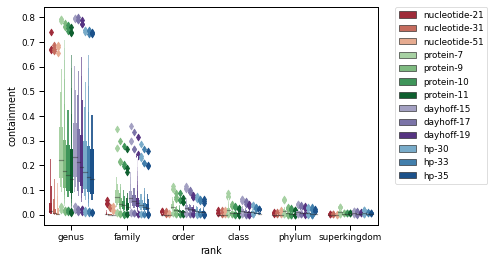

In [14]:
g=sns.boxenplot(data=containMelt, x="rank", y="containment", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.all.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

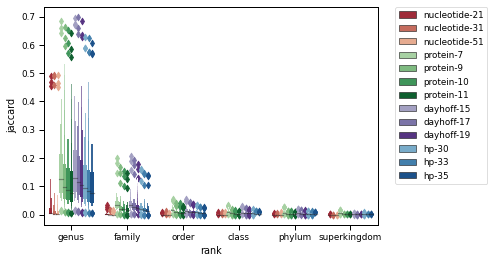

In [15]:
g=sns.boxenplot(data=jaccardMelt, x="rank", y="jaccard", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order ) #palette="GnBu_d"

lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.all.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

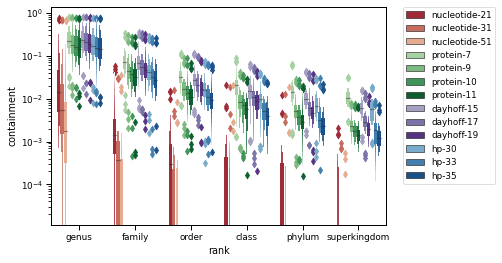

In [16]:
g=sns.boxenplot(data=containMelt, x="rank", y="containment", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.all.logscale.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

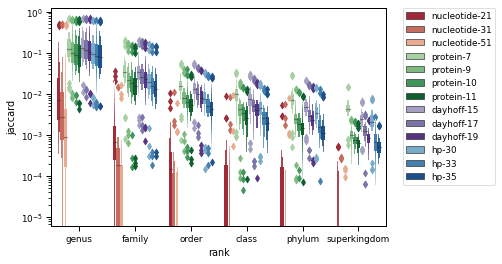

In [17]:
g=sns.boxenplot(data=jaccardMelt, x="rank", y="jaccard", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.all.logscale.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [18]:
selected_alphak = ["nucleotide-21","nucleotide-31", "nucleotide-51", "protein-10", "dayhoff-19", "hp-35"]

In [19]:
selectedContain =  containMelt[containMelt["alpha-ksize"].isin(selected_alphak)]

In [20]:
selectedContain

,evolpath,ksize,alphabet,alpha-ksize,rank,containment
5914,path1,19,dayhoff,dayhoff-19,anchor_species,1.0
5915,path10,19,dayhoff,dayhoff-19,anchor_species,1.0
5916,path100,19,dayhoff,dayhoff-19,anchor_species,1.0
5917,path1000,19,dayhoff,dayhoff-19,anchor_species,1.0
5918,path1001,19,dayhoff,dayhoff-19,anchor_species,1.0
...,...,...,...,...,...,...
269082,path995,31,nucleotide,nucleotide-31,superkingdom,0.0
269083,path996,31,nucleotide,nucleotide-31,superkingdom,0.0
269084,path997,31,nucleotide,nucleotide-31,superkingdom,0.0
269085,path998,31,nucleotide,nucleotide-31,superkingdom,0.0


In [21]:
selectedJaccard =  jaccardMelt[jaccardMelt["alpha-ksize"].isin(selected_alphak)]

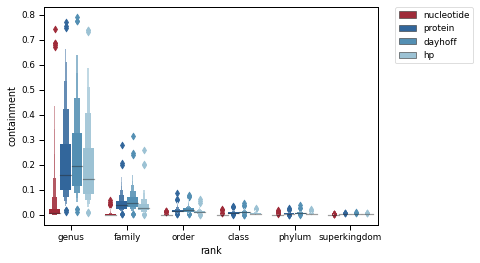

In [22]:
g=sns.boxenplot(data=selectedContain, x="rank", y="containment", hue="alphabet", palette=alphabet_colors, order=rankorder, hue_order=alphabet_colors ) #palette="GnBu_d"
lgd= g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.alpha-avg.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

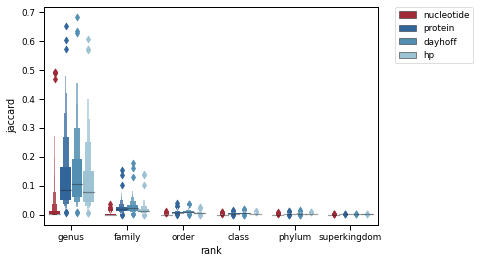

In [23]:
g=sns.boxenplot(data=selectedJaccard, x="rank", y="jaccard", hue="alphabet", palette=alphabet_colors, order=rankorder, hue_order=alphabet_colors ) #palette="GnBu_d"
lgd = g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.alpha-avg.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

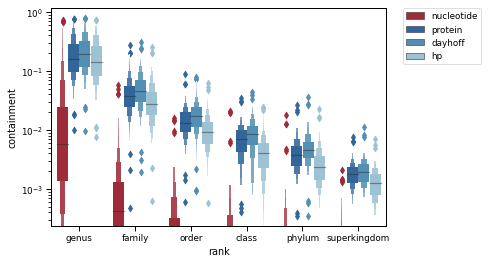

In [24]:
g=sns.boxenplot(data=selectedContain, x="rank", y="containment", hue="alphabet", palette=alphabet_colors, order=rankorder, hue_order=alphabet_colors ) #palette="GnBu_d"
g.set(yscale="log")
lgd = g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.alpha-avg.logscale.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

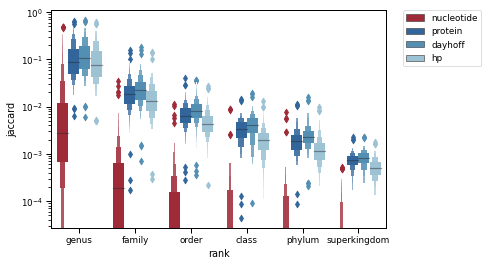

In [25]:
g=sns.boxenplot(data=selectedJaccard, x="rank", y="jaccard", hue="alphabet", palette=alphabet_colors, order=rankorder, hue_order=alphabet_colors ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.alpha-avg.logscale.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [26]:
prot_nucl_onlyContain =  containMelt[containMelt["alpha-ksize"].isin(["nucleotide-21","nucleotide-31", "nucleotide-51", "protein-10"])]
                                                                     

In [27]:
prot_nucl_onlyJaccard =  jaccardMelt[jaccardMelt["alpha-ksize"].isin(["nucleotide-21","nucleotide-31", "nucleotide-51", "protein-10"])]


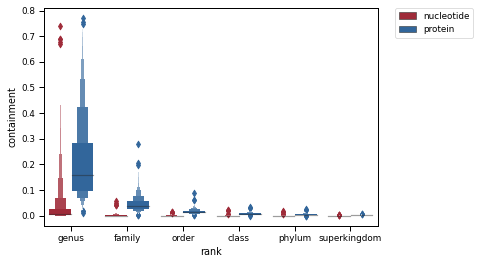

In [28]:
g=sns.boxenplot(data=prot_nucl_onlyContain, x="rank", y="containment", hue="alphabet", palette=protnucl_colors, order=rankorder, hue_order=protnucl_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.nucl-prot.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

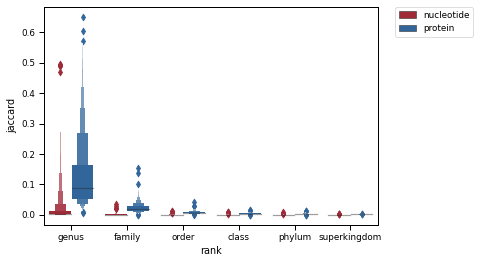

In [29]:
g=sns.boxenplot(data=prot_nucl_onlyJaccard, x="rank", y="jaccard", hue="alphabet", palette=protnucl_colors, order=rankorder, hue_order=protnucl_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.nucl-prot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

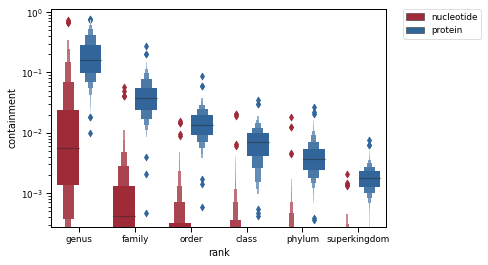

In [30]:
g=sns.boxenplot(data=prot_nucl_onlyContain, x="rank", y="containment", hue="alphabet", palette=protnucl_colors, order=rankorder, hue_order=protnucl_colors ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.nucl-prot.logscale.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

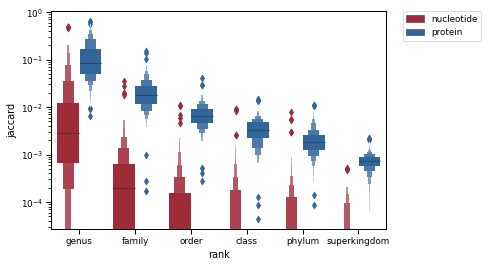

In [31]:
g=sns.boxenplot(data=prot_nucl_onlyJaccard, x="rank", y="jaccard", hue="alphabet", palette=protnucl_colors, order=rankorder, hue_order=protnucl_colors ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.nucl-prot.logscale.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

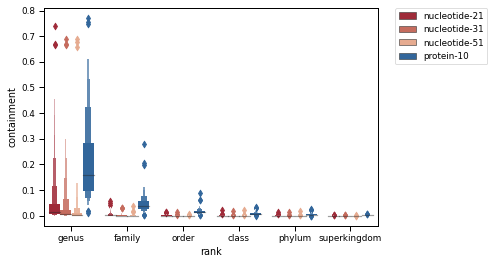

In [32]:
g=sns.boxenplot(data=prot_nucl_onlyContain, x="rank", y="containment", hue="alpha-ksize", palette=pnlong_colors, order=rankorder, hue_order=pnlong_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.nucl3-prot.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

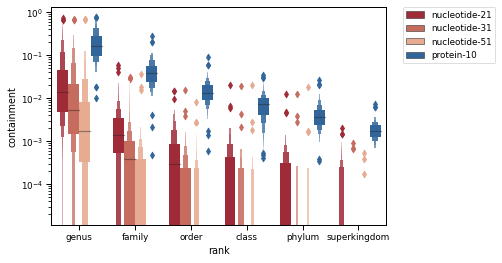

In [33]:
g=sns.boxenplot(data=prot_nucl_onlyContain, x="rank", y="containment", hue="alpha-ksize", palette=pnlong_colors, order=rankorder, hue_order=pnlong_colors ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.nucl3-prot.logscale.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

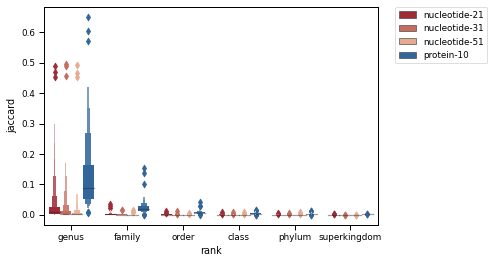

In [34]:
g=sns.boxenplot(data=prot_nucl_onlyJaccard, x="rank", y="jaccard", hue="alpha-ksize", palette=pnlong_colors, order=rankorder, hue_order=pnlong_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.nucl3-prot.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

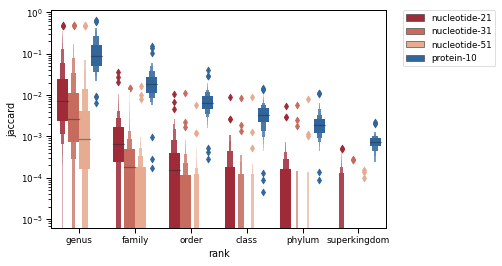

In [35]:
g=sns.boxenplot(data=prot_nucl_onlyJaccard, x="rank", y="jaccard", hue="alpha-ksize", palette=pnlong_colors, order=rankorder, hue_order=pnlong_colors ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.nucl3-prot.logscale.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')